In [1]:
from scipy import *
from scipy.linalg import norm, pinv
 
from matplotlib import pyplot as plt
 

In [2]:
class RBF:
     
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))

        
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return exp(-self.beta * norm(c-d)**2) # disntância euclidiana entre um ponto do vetor de entrada e o meu vetor prototipo
     
        
    def _calcAct(self, X): # calculate activations of RBFs
        G = zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
     
        
    def train(self, X, Y):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        # choose random center vectors from training set
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i,:] for i in rnd_idx]
         
        print("center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
        # print(G)
         
        # calculate output weights (pseudoinverse)
        self.W = dot(pinv(G), Y)
         
    def test(self, X):
        """ X: matrix of dimensions n x indim """
         
        G = self._calcAct(X)
        Y = dot(G, self.W)
        return Y
 

In [3]:
    # ----- 1D Example ------------------------------------------------
    
    n = 100
     
    x = mgrid[-1:1:complex(0,n)].reshape(n, 1)
    # set y and add random noise
    y = sin(3*(x+0.5)**3 - 1)
    # y += random.normal(0, 0.1, y.shape)


In [4]:
    # rbf regression
    rbf = RBF(1, 10, 1)
    rbf.train(x, y)
    z = rbf.test(x)

center [array([-0.5959596]), array([-0.23232323]), array([-0.81818182]), array([0.87878788]), array([-0.95959596]), array([-0.39393939]), array([0.63636364]), array([-0.97979798]), array([-0.7979798]), array([-0.31313131])]


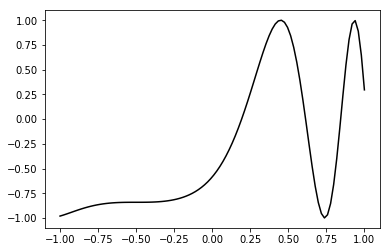

In [5]:
    # plot original data
    #plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'k-')

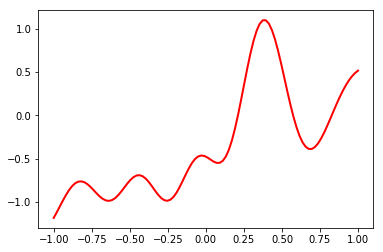

In [6]:
    # plot learned model
    plt.plot(x, z, 'r-', linewidth=2)

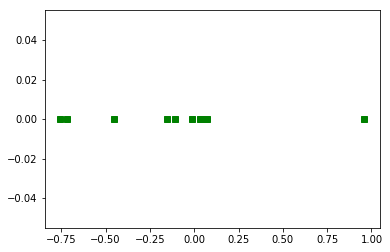

In [7]:
    # plot rbfs
    plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')

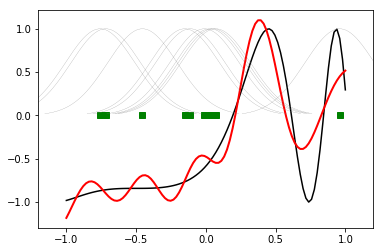

In [8]:
    
    plt.plot(x, y, 'k-')
    plt.plot(x, z, 'r-', linewidth=2)
    plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')
    
    for c in rbf.centers:
        # RF prediction lines
        cx = arange(c-0.7, c+0.7, 0.01)
        cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
        plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
     
    plt.xlim(-1.2, 1.2)
    plt.show()


## Referênces
* [ RBF Python](http://www.rueckstiess.net/research/snippets/show/72d2363e)
* [ Radial Basis Function Network (RBFN) Tutorial](http://mccormickml.com/2013/08/15/radial-basis-function-network-rbfn-tutorial/)